In [1]:
import pandas as pd

# Customer dataset
df = pd.read_csv('Customers.csv')

# Inspecting the dataset
print("Shape of the dataset:", df.shape)
print("Data types:\n", df.dtypes)
print("Missing values:\n", df.isnull().sum())
print("Summary statistics:\n", df.describe())
print("Checking for duplicates:", df.duplicated().sum())

Shape of the dataset: (200, 5)
Data types:
 CustomerID             int64
Genre                 object
Age                    int64
Annual_Income_(k$)     int64
Spending_Score         int64
dtype: object
Missing values:
 CustomerID            0
Genre                 0
Age                   0
Annual_Income_(k$)    0
Spending_Score        0
dtype: int64
Summary statistics:
        CustomerID         Age  Annual_Income_(k$)  Spending_Score
count  200.000000  200.000000          200.000000      200.000000
mean   100.500000   38.850000           60.560000       50.200000
std     57.879185   13.969007           26.264721       25.823522
min      1.000000   18.000000           15.000000        1.000000
25%     50.750000   28.750000           41.500000       34.750000
50%    100.500000   36.000000           61.500000       50.000000
75%    150.250000   49.000000           78.000000       73.000000
max    200.000000   70.000000          137.000000       99.000000
Checking for duplicates: 0


In [2]:
#2.Data Preprocessing
from sklearn.preprocessing import StandardScaler

# Selecting numerical columns for scaling
numeric_columns = df.select_dtypes(include=['float64', 'int64']).columns

# Standardizing the numerical columns
scaler = StandardScaler()
df_scaled = df[numeric_columns]
df_scaled = scaler.fit_transform(df_scaled)

# Converting scaled data back to DataFrame
df_scaled = pd.DataFrame(df_scaled, columns=numeric_columns)

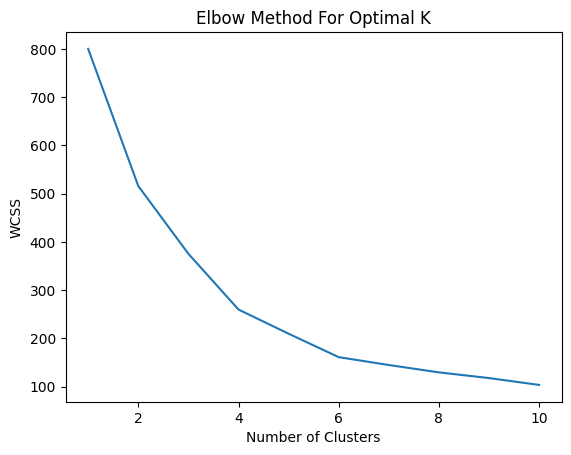

In [3]:
#3.Clustering
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# Elbow method
wcss = []  # Within-cluster sum of squares
for i in range(1, 11):  # Trying different numbers of clusters (1-10)
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=42)
    kmeans.fit(df_scaled)
    wcss.append(kmeans.inertia_)

# Plot WCSS vs. Number of clusters
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method For Optimal K')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

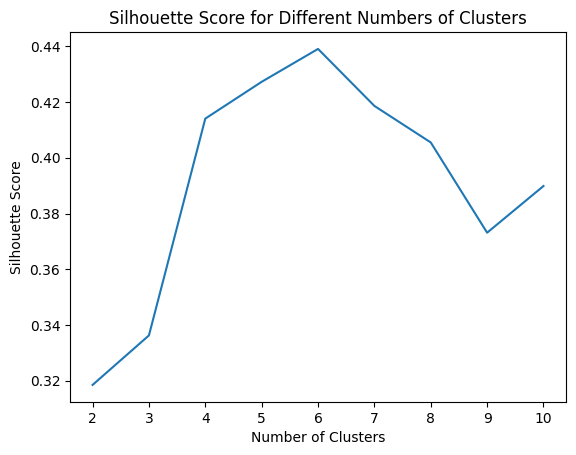

In [4]:
#Silhouette Score
from sklearn.metrics import silhouette_score

sil_scores = []
for i in range(2, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=42)
    kmeans.fit(df_scaled)
    score = silhouette_score(df_scaled, kmeans.labels_)
    sil_scores.append(score)

# Plot Silhouette Scores
plt.plot(range(2, 11), sil_scores)
plt.title('Silhouette Score for Different Numbers of Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.show()

In [5]:
#K-means Clustering
# Assuming the optimal number of clusters is found to be 4
optimal_clusters = 4

# Fits the KMeans model
kmeans = KMeans(n_clusters=optimal_clusters, init='k-means++', max_iter=300, n_init=10, random_state=42)
df['Cluster'] = kmeans.fit_predict(df_scaled)

# Showing the first few rows of the dataset with cluster labels
print(df.head())

   CustomerID   Genre  Age  Annual_Income_(k$)  Spending_Score  Cluster
0           1    Male   19                  15              39        2
1           2    Male   21                  15              81        2
2           3  Female   20                  16               6        2
3           4  Female   23                  16              77        2
4           5  Female   31                  17              40        2


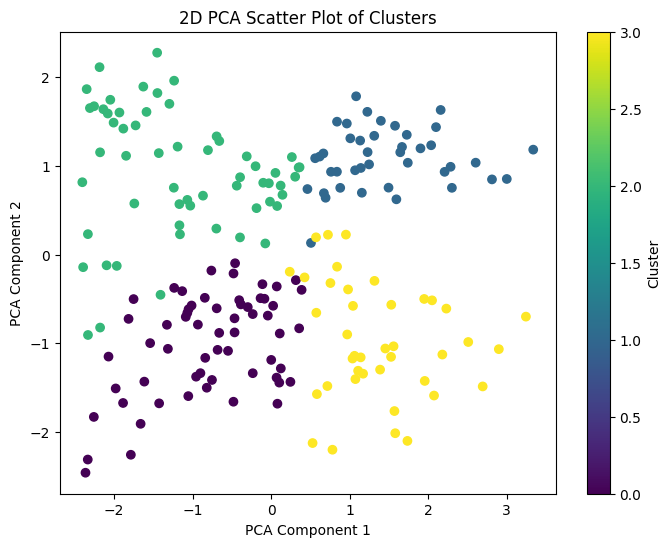

In [6]:
#4.Visualisation
#2D Scatter plot
from sklearn.decomposition import PCA

# Apply PCA
pca = PCA(n_components=2)
df_pca = pca.fit_transform(df_scaled)

# Plot the 2D scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(df_pca[:, 0], df_pca[:, 1], c=df['Cluster'], cmap='viridis')
plt.title('2D PCA Scatter Plot of Clusters')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.colorbar(label='Cluster')
plt.show()

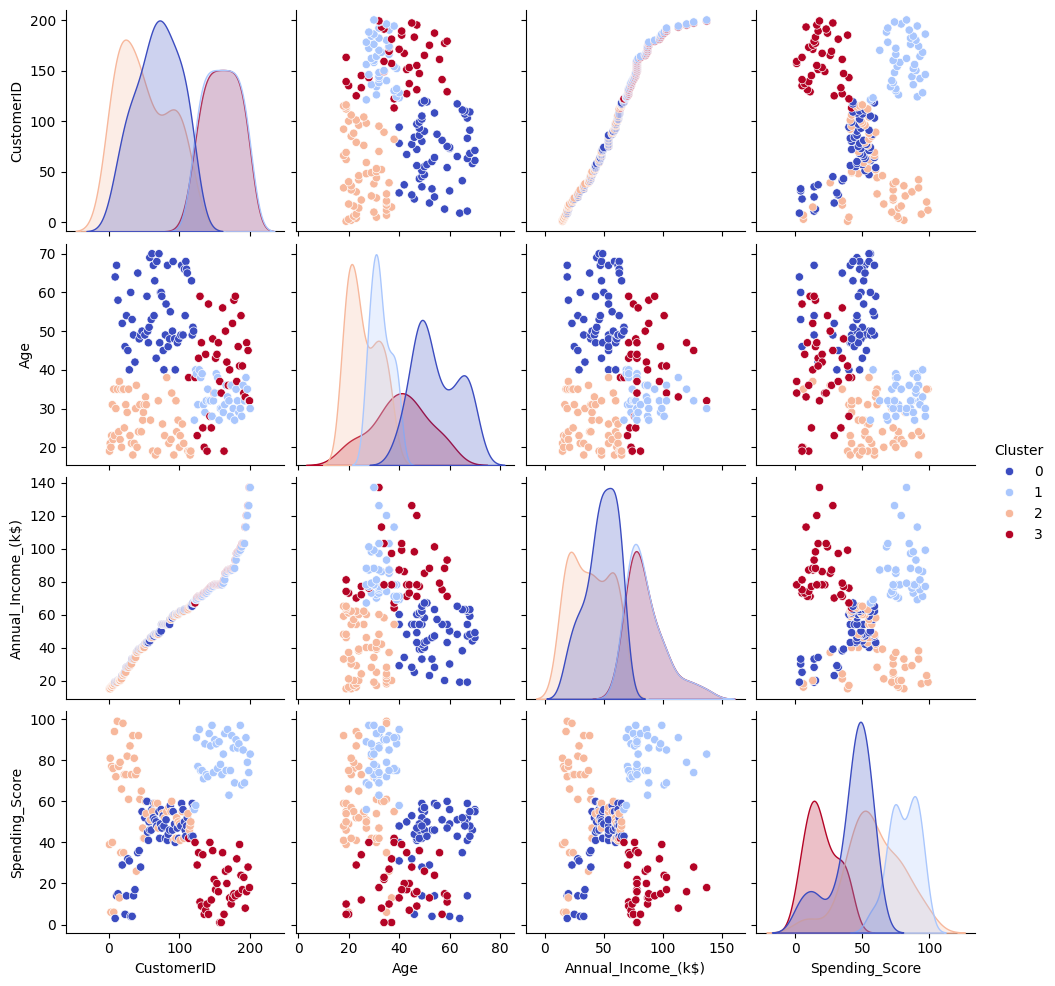

In [12]:
#Pair Plots
import seaborn as sns

# Pair plot colored by cluster
sns.pairplot(df, hue='Cluster', palette='coolwarm')
plt.show()

C:\Users\NAGESWARARAO VAKA\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but PCA was fitted with feature names
  warnings.warn(


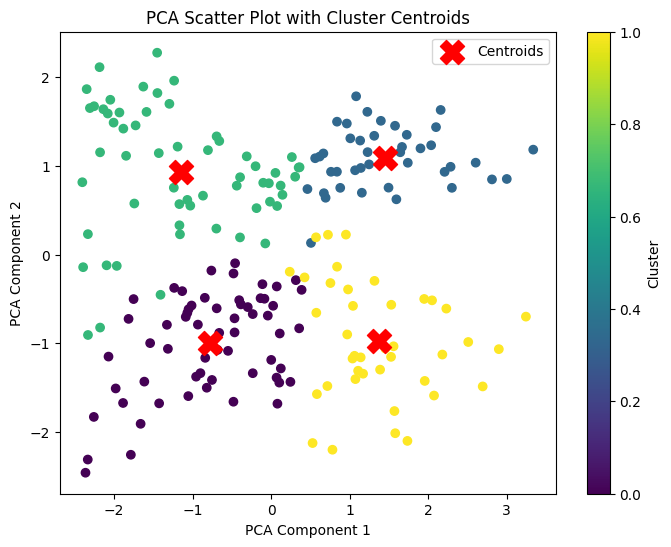

In [10]:
#Centroid Visuals
# Getting cluster centroids from KMeans
centroids = pca.transform(kmeans.cluster_centers_)

# Plot the centroids on the 2D PCA plot
plt.figure(figsize=(8, 6))
plt.scatter(df_pca[:, 0], df_pca[:, 1], c=df['Cluster'], cmap='viridis')
plt.scatter(centroids[:, 0], centroids[:, 1], s=300, c='red', marker='X', label='Centroids')
plt.title('PCA Scatter Plot with Cluster Centroids')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.colorbar(label='Cluster')
plt.legend()
plt.show()